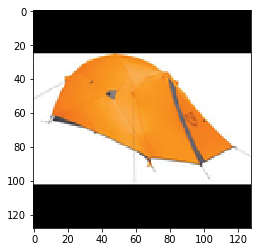

(128, 128)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np   
from PIL import Image, ImageOps
import glob, os
import cv2

##### Padding #####

#im_pth = "./gear_images/axes/100172.jpeg"
#im_pth = "./gear_images/axes/100937.jpeg"
im_pth = "./gear_images/tents/10333522_zm.jpeg"

im = Image.open(im_pth)
#print(im.size)
imgwidth = im.size[0]
imgheight = im.size[1]
maxdim = max(imgwidth, imgheight)

# create a new blank image and centrally paste the original image on it
new_im = Image.new("RGB", (maxdim, maxdim), color='black')
new_im.paste(im, ((maxdim-imgwidth)//2,
                    (maxdim-imgheight)//2))
# Resize image to 128x128
new_im.thumbnail((128,128), Image.ANTIALIAS)
plt.imshow(new_im)
plt.show()
print(new_im.size)
#print(maxdim)
#print(imgwidth)
#print(imgheight)

In [2]:
##### Intensity Normalization #####

def normalize(arr):
    """
    Linear normalization
    """
    arr = arr.astype('float')
    print(arr.shape)

    # Do not touch the alpha channel
    for i in range(3):
        minval = arr[...,i].min()
        print(arr[...,i])
        maxval = arr[...,i].max()
        if minval != maxval:
            arr[...,i] -= minval
            arr[...,i] *= (255.0/(maxval-minval))
    return arr

arr = np.array(new_im)
norm_im = Image.fromarray(normalize(arr).astype('uint8'),'RGB')

(128, 128, 3)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


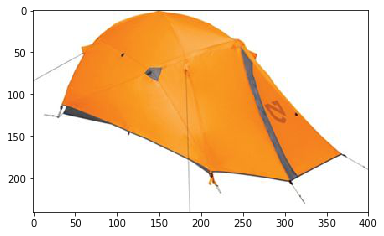

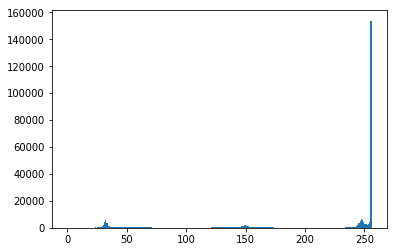

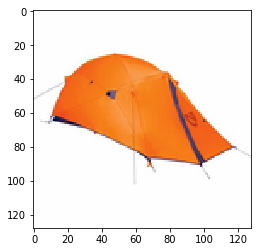

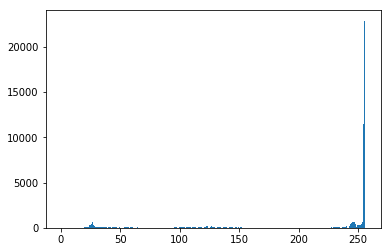

In [41]:
#### Plotting #####

#convert images to array
im_arr = np.array(im)
norm_im_arr = np.array(norm_im)

#plot original image and histogram
plt.imshow(im); plt.show()
plt.hist(im_arr.ravel(),256,[0,256]); plt.show()

#plot normalized image and histogram
plt.imshow(norm_im); plt.show()
plt.hist(norm_im_arr.ravel(),256,[0,256]); plt.show()

#new_img.save('/tmp/normalized.png')